In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df=pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')

In [3]:
df1=df.copy()

In [4]:
df['Year'] = df['Quarter'].str.split('_').str[1]
df['Quarter'] = df['Quarter'].str.split('_').str[0]

In [5]:
df = pd.get_dummies(df, columns=['Quarter'])

In [6]:
df['t'] = range(1, len(df) + 1)

In [7]:
df['t_square']=df['t']**2

In [8]:
df

,Sales,Year,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,t,t_square
0,1734.827000,86,1,0,0,0,1,1
1,2244.960999,86,0,1,0,0,2,4
2,2533.804993,86,0,0,1,0,3,9
3,2154.962997,86,0,0,0,1,4,16
4,1547.818996,87,1,0,0,0,5,25
5,2104.411995,87,0,1,0,0,6,36
6,2014.362999,87,0,0,1,0,7,49
7,1991.746998,87,0,0,0,1,8,64
8,1869.049999,88,1,0,0,0,9,81
9,2313.631996,88,0,1,0,0,10,100


Changing Columns order

In [9]:
df.head()

,Sales,Year,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,t,t_square
0,1734.827000,86,1,0,0,0,1,1
1,2244.960999,86,0,1,0,0,2,4
2,2533.804993,86,0,0,1,0,3,9
3,2154.962997,86,0,0,0,1,4,16
4,1547.818996,87,1,0,0,0,5,25


In [10]:
df['Log_Sales'] = np.log(df['Sales'])


In [11]:
df['Quarter']=df1.Quarter

In [12]:
dcr=['Quarter','Sales','t','Log_Sales','t_square','Quarter_Q1','Quarter_Q2','Quarter_Q3','Quarter_Q4']

In [13]:
new_df=df[dcr]

In [14]:
df=new_df

In [15]:
df

,Quarter,Sales,t,Log_Sales,t_square,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
0,Q1_86,1734.827000,1,7.458663,1,1,0,0,0
1,Q2_86,2244.960999,2,7.716443,4,0,1,0,0
2,Q3_86,2533.804993,3,7.837477,9,0,0,1,0
3,Q4_86,2154.962997,4,7.675529,16,0,0,0,1
4,Q1_87,1547.818996,5,7.344602,25,1,0,0,0
5,Q2_87,2104.411995,6,7.651791,36,0,1,0,0
6,Q3_87,2014.362999,7,7.608058,49,0,0,1,0
7,Q4_87,1991.746998,8,7.596767,64,0,0,0,1
8,Q1_88,1869.049999,9,7.533186,81,1,0,0,0
9,Q2_88,2313.631996,10,7.746574,100,0,1,0,0


Splitting Data

In [16]:
Train=df.head(32)
Test=df.tail(9)

Checking various Models

In [17]:
#Linear Model

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

792.030171932028

In [18]:
#Exponential

Exp = smf.ols('Log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


617.673125718348

In [19]:
#Quadratic

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

446.7167069580693

In [20]:
#Additive seasonality

add_sea = smf.ols('Sales~Quarter_Q1+Quarter_Q2+Quarter_Q3+Quarter_Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Quarter_Q1','Quarter_Q2','Quarter_Q3','Quarter_Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1911.7150599988038

In [21]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Sales~t+t_square+Quarter_Q1+Quarter_Q2+Quarter_Q3+Quarter_Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Quarter_Q1','Quarter_Q2','Quarter_Q3','Quarter_Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

280.50990714343266

In [22]:
#Multiplicative Seasonality

Mul_sea = smf.ols('Log_Sales~Quarter_Q1+Quarter_Q2+Quarter_Q3+Quarter_Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1970.1936555255343

In [23]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('Log_Sales~t+Quarter_Q1+Quarter_Q2+Quarter_Q3+Quarter_Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

467.9198050223535

In [24]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,280.509907
2,rmse_Quad,446.716707
6,rmse_Mult_add_sea,467.919805
1,rmse_Exp,617.673126
0,rmse_linear,792.030172
3,rmse_add_sea,1911.715060
5,rmse_Mult_sea,1970.193656


As the Additive seasonality Quadratic has the lower rmse value it is the model we are going to use for prediction .


we have created dummies for the month column and also created the t ,t square and log_sales columns.


In [25]:

add_sea_Quad = smf.ols('Sales~t+t_square+Quarter_Q1+Quarter_Q2+Quarter_Q3+Quarter_Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Quarter_Q1','Quarter_Q2','Quarter_Q3','Quarter_Q4','t','t_square']]))

In [26]:
pred_add_sea_quad

33    4264.178607
34    4311.803302
35    4190.873370
36    4141.181850
37    4823.418475
38    4888.212351
39    4784.451601
40    4751.929264
41    5451.335070
dtype: float64

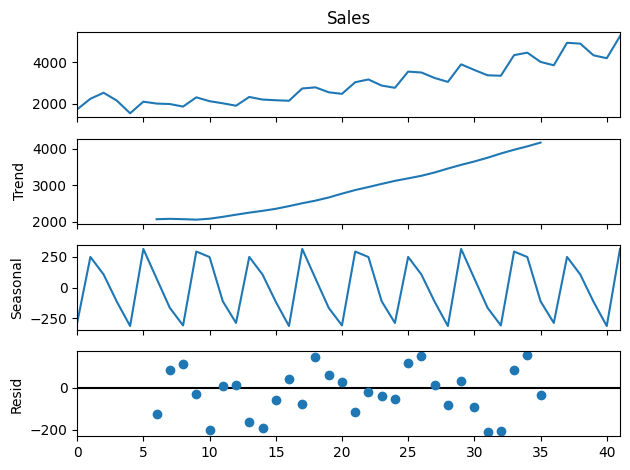

In [27]:
decompose_ts_add = seasonal_decompose(df.Sales,period=12)
decompose_ts_add.plot()
plt.show()

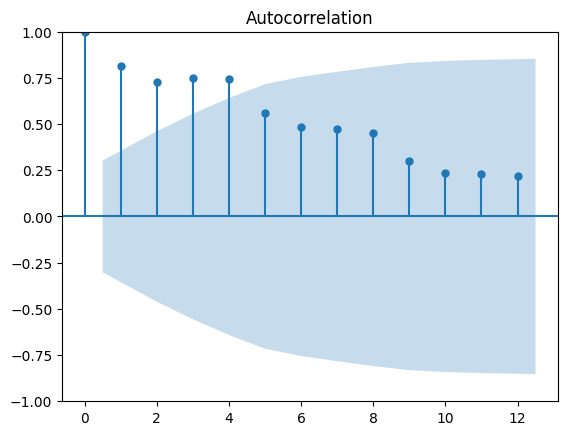

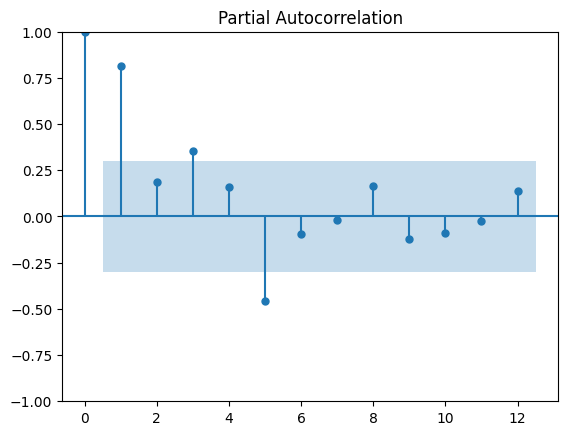

In [28]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=12)
tsa_plots.plot_pacf(df.Sales,lags=12)
plt.show()

In [29]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

Simple Exponential Method

In [30]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


25.148454191791096

Holt method

In [31]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


18.111947922633803

Holts winter exponential smoothing with additive seasonality and additive trend

In [33]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

15.758658578684608

Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [35]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

15.309755248778723

We can see that Holts winter exponential smoothing with multiplicative seasonality and additive trend model is having low mape value

In [36]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.0 MB/s eta 0:00:00


In [37]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [38]:
stepwise_fit = auto_arima(df['Sales'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.73 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=617.615, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=588.401, Time=0.65 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=617.215, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=619.036, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=590.348, Time=0.78 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=590.320, Time=0.43 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=586.466, Time=0.14 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=588.405, Time=0.57 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=588.375, Time=0.32 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -290.325
Date:                            Wed, 08 Nov 2023   AIC                            584.649
Time:                                    13:57:05   BIC                            588.076
Sample:                                         0   HQIC                           585.897
                                             - 42                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8589      0.071     12.095      0.000       0.720       0.998
sigma2        5.5e+04   1.55e+04      3.556      0.000    2.47e+04    8.53e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.79   Prob(JB):                         0.45
Heteroskedasticity (H):               1.69   Skew:                             0.26
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(Train['Sales'],
                order = (0, 1,0),
                seasonal_order =(1, 0,0, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   32
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -219.416
Date:                            Wed, 08 Nov 2023   AIC                            442.833
Time:                                    13:58:20   BIC                            445.701
Sample:                                         0   HQIC                           443.767
                                             - 32                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.7517      0.112      6.695      0.000       0.532       0.972
sigma2      5.868e+04   2.23e+04      2.636      0.008     1.5e+04    1.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.63   Prob(JB):                         0.43
Heteroskedasticity (H):               1.11   Skew:                             0.15
Prob(H) (two-sided):                  0.88   Kurtosis:                         1.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""